# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Noah Waltmann

Datum: 19.11.2023

Gruppe: 13

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Ist es mögloch durch das Messen von Temperaturen zweier definierter Mengen an Flüssigkeiten die Wärmekapazitäten zu bestimmen?

## Versuchsaufbau und Durchführung

Aufbau: 
Zwei Temperatursensoren befinden sich in zwei Behältern mit jeweils 200g Wasser.
Der Rechte Behälter ist gross genug um mindestens 400g Wasser zu halten.
Der rechte Behälter enthält Wasser bei Raumtemperatur.
Der linke Behälter enthält Wasser bei einer Temperatur zwischen 40 und 60 Grad Celsius.

Durchführung:
Die Sensoren messen beim Start der Messung die jeweilige Temperatur des Behälters, in dem sie sich befinden.
Dann wird der Behälter höherer Temperatur mitsamt des darin befindlichen Sensors in den grösseren, kalten Behälter umgefüllt.
Vor beenden der Messung wird eine gewisse Zeit abgewartet, damit sich die Sensoren an die Temperatur des gemischten Wassers angleichen können.

<img src="figures/heat_capacity_image.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = "/home/pi/calorimetry_home/data/heat_capacity/try_one/try_one.h5"
# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py

with h5py.File(path) as f:
    #grop RawData is saved
    grp_raw = f["RawData"]

    author=f.attrs["authors"]
    created=f.attrs["created"]
    experiment=f.attrs["experiment"]
    group_number=f.attrs["group_number"]

    #initializing list uuids to be used later
    uuids=[]

    for uuid in grp_raw:    #for every sensor uuid is saved in list, datasets and metadata is saved in dict
        globals()["data_"+uuid]={}  #initializing dicts for datasets to be associated to metadata
        uuids.append(uuid)     #uuid is saved

        globals()["data_"+uuid]["temps"]=grp_raw[uuid]["temperatures"][:]     #datasets are saved
        globals()["data_"+uuid]["time"]=grp_raw[uuid]["timestamps"][:]

        metadata={} #initializing metadata dict

        for attr_keys in grp_raw[uuid].attrs.keys():     #every attribute and its value are saved in metadata dict
            metadata[attr_keys]=grp_raw[uuid].attrs[attr_keys]

        metadata["unit_temps"]=grp_raw[uuid]["temperatures"].attrs["unit"]
        metadata["unit_time"]=grp_raw[uuid]["timestamps"].attrs["unit"]

        globals()["data_"+uuid]["metadata"]=metadata        #metadata is added to dict
# DONE #

#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


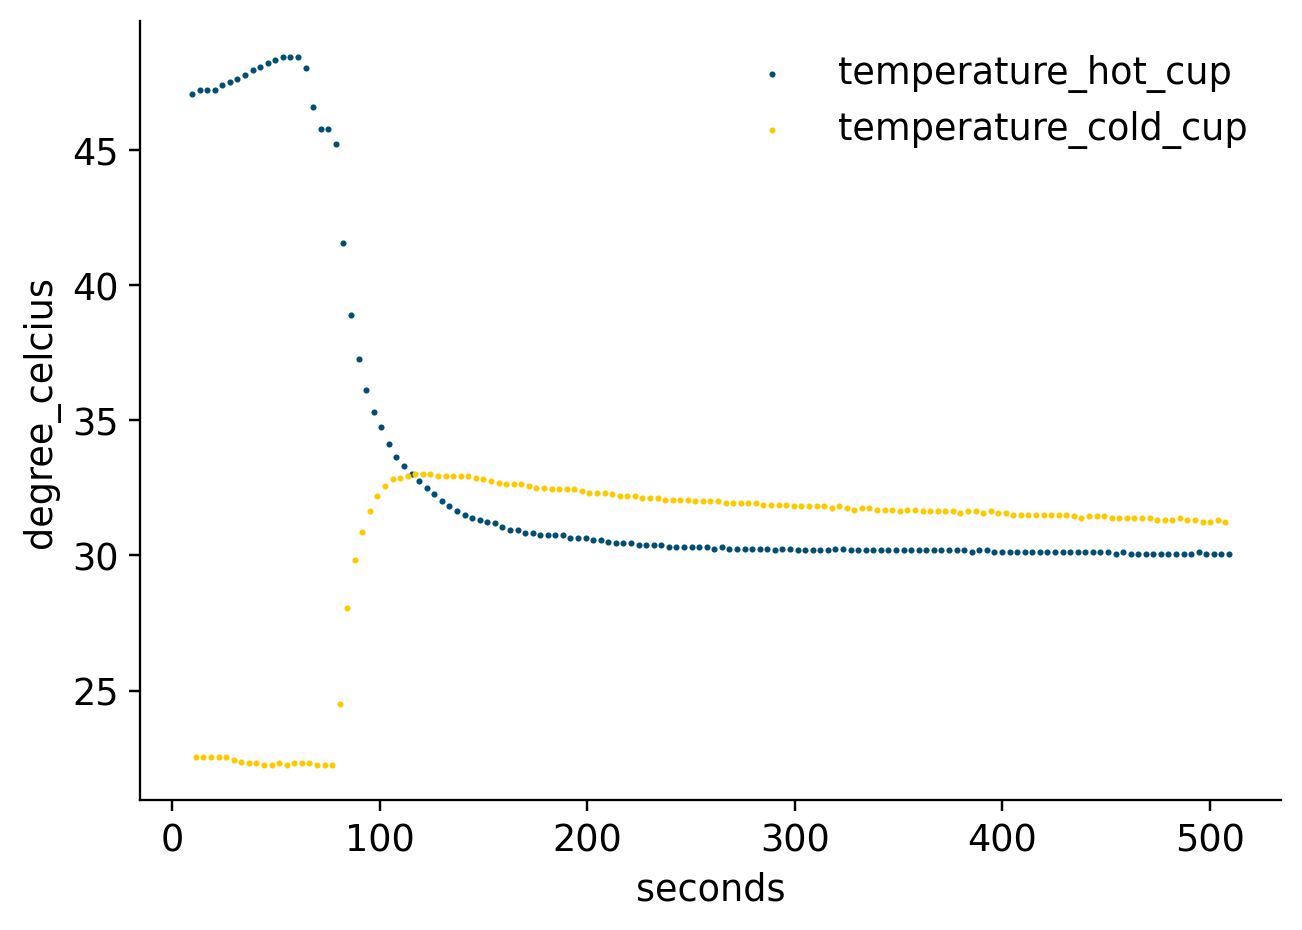

In [4]:
# TODO: Use the temperature and time data for plotting
import matplotlib.pyplot as plt

for uuid in uuids:
    temps=globals()["data_"+uuid]["temps"]
    time=globals()["data_"+uuid]["time"]
    plt.scatter(time,temps,s=1,label=globals()["data_"+uuid]["metadata"]["name"])

plt.xlabel(globals()["data_"+uuids[0]]["metadata"]["unit_time"])
plt.ylabel(globals()["data_"+uuids[0]]["metadata"]["unit_temps"])
plt.legend()
plt.savefig('heat_capacity_plot.svg')

    
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
mass=m_json.get_json_entry("/home/pi/calorimetry_home/data/heat_capacity/try_one/archive","1ee82f5e-c2d8-6316-a26a-0534c4e5161b",["probe","metadata"])

# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
#start temperatures

t_2=globals()["data_"+uuids[0]]["temps"][0]
t_1=globals()["data_"+uuids[1]]["temps"][0]

#mixed temperature
t_M=(globals()["data_"+uuids[0]]["temps"][-1]+globals()["data_"+uuids[1]]["temps"][-1])/2

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter
m_add=float(mass)
m_cup=float(mass)

C = ((m_add * water_heat_capa * (t_2 - t_M))/(t_M - t_1)) - m_cup *  water_heat_capa

# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result
print("Experiment information: author ",author," ; created ",created," ; experiment ",experiment," ; group number ",group_number)
print("The heat capacity of the cup with the cold water is ", C, "J/K")

# DONE #

Experiment information: author  Noah Waltmann  ; created  18-11-2023, 18:23:02  ; experiment  Kalorimetrie Kuechentisch  ; group number  13
The heat capacity of the cup with the cold water is  0.8585945945945946 J/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Das ermitteln der Wärmekapazität von zwei definierten Mengen Wasser ist mithilfe von Temperaturmessungen möglich.

Die gemessenen Daten sehen zunächst fehlerhaft aus, da die Temperatur des Sensors, der im kalten Gefäss startet, die des anderen übersteigt. 
Eine denkbare Erklärung wäre beispielsweise, dass der Effekt durch eine fehlende Kallibrierung zustandekommen könnte .

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [ ]:
Ich habe bei diesem Versuch zum ersten mal Messdaten digital und eigenhändisch erfasst und sie danach ausgewertet.
Ich gesehen, wie ein gutes Umgehen mit Daten und Metadaten den Prozess eines Experiments vereinfacht und reproduzierbar und nachvollziehbar macht.